In [1]:
import yaml
import matplotlib.pyplot as plt
import math

In [2]:
with open("R_pesati/Wjets.txt", "r") as f:
    Wjets_pesati = yaml.load(f, Loader=yaml.SafeLoader)
with open("R_pesati/Zjets.txt", "r") as f:
    Zjets_pesati = yaml.load(f, Loader=yaml.SafeLoader)
with open("R_non_pesati/Wjets.txt", "r") as f:
    Wjets_non_pesati = yaml.load(f, Loader=yaml.SafeLoader)
with open("R_non_pesati/Zjets.txt", "r") as f:
    Zjets_non_pesati = yaml.load(f, Loader=yaml.SafeLoader)
with open("R_dati/R_dati.txt", "r") as f:
    R_dati = yaml.load(f, Loader=yaml.SafeLoader)

In [3]:
regions = list(Wjets_pesati.keys())
x = [i for i in range(21)]

# R prime

## Pesati

Wjets
R = 0.9445 +- 0.0349

Zjets
R = 0.8538 +- 0.0405


[-1, 21, 0, 4]

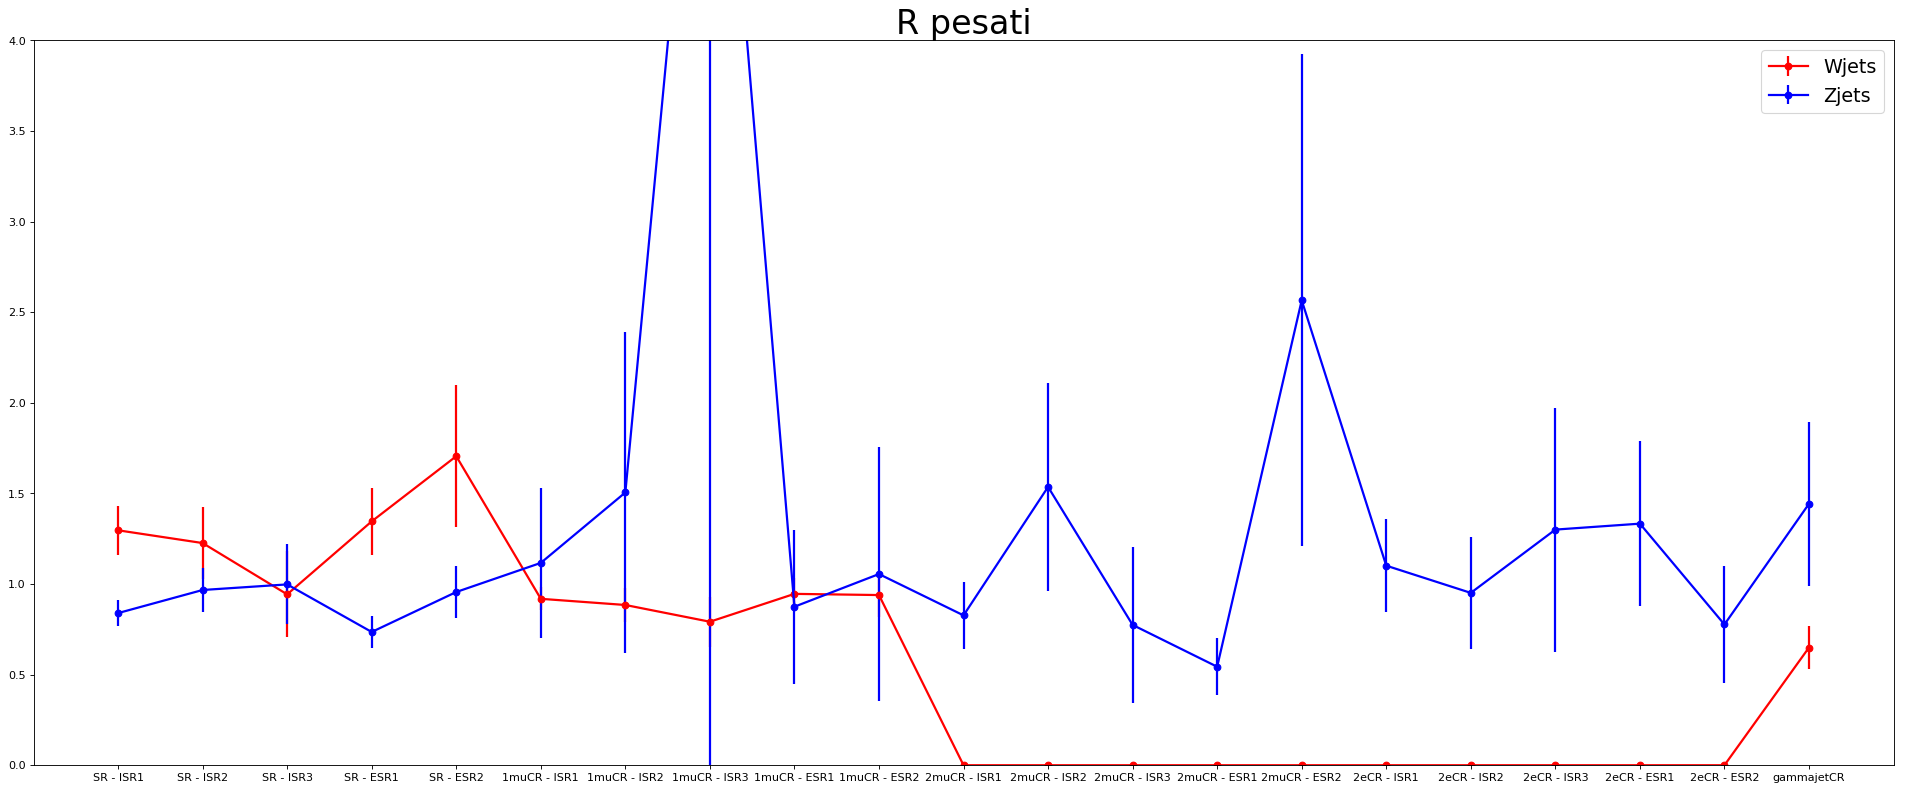

In [4]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

R = [ Wjets_pesati[i]["R_MC"] for i in regions ]
sigma_R = [ Wjets_pesati[i]["sigma_R_MC"] for i in regions ]
plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="Wjets") 

# media pesata sugli errori
print("Wjets")
num = 0;
den = 0;

for i in range(21):
    if sigma_R[i] is not 0:
        num = num + R[i]/pow(sigma_R[i], 2)
        den = den + 1/pow(sigma_R[i], 2)

R_p = num/den
sigma_p = math.sqrt(1/den)
print("R = " + repr(round(R_p, 4)) + " +- " + repr(round(sigma_p, 4)))



R = [ Zjets_pesati[i]["R_MC"] for i in regions ]
sigma_R = [ Zjets_pesati[i]["sigma_R_MC"] for i in regions ]

plt.errorbar(x, R, yerr=sigma_R, fmt="ob", linestyle="-", linewidth=2, label="Zjets") 


# media pesata sugli errori
print("\nZjets")
num = 0;
den = 0;

for i in range(21):
    if sigma_R[i] is not 0:
        num = num + R[i]/pow(sigma_R[i], 2)
        den = den + 1/pow(sigma_R[i], 2)

R_p = num/den
sigma_p = math.sqrt(1/den)
print("R = " + repr(round(R_p, 4)) + " +- " + repr(round(sigma_p, 4)))


plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("R pesati", fontsize=30)

plt.axis([-1, 21, 0, 4])



## Non pesati

Wjets
R = 1.1049 +- 0.0241

Zjets
R = 1.0128 +- 0.0195


Text(0.5, 1.0, 'R non pesati')

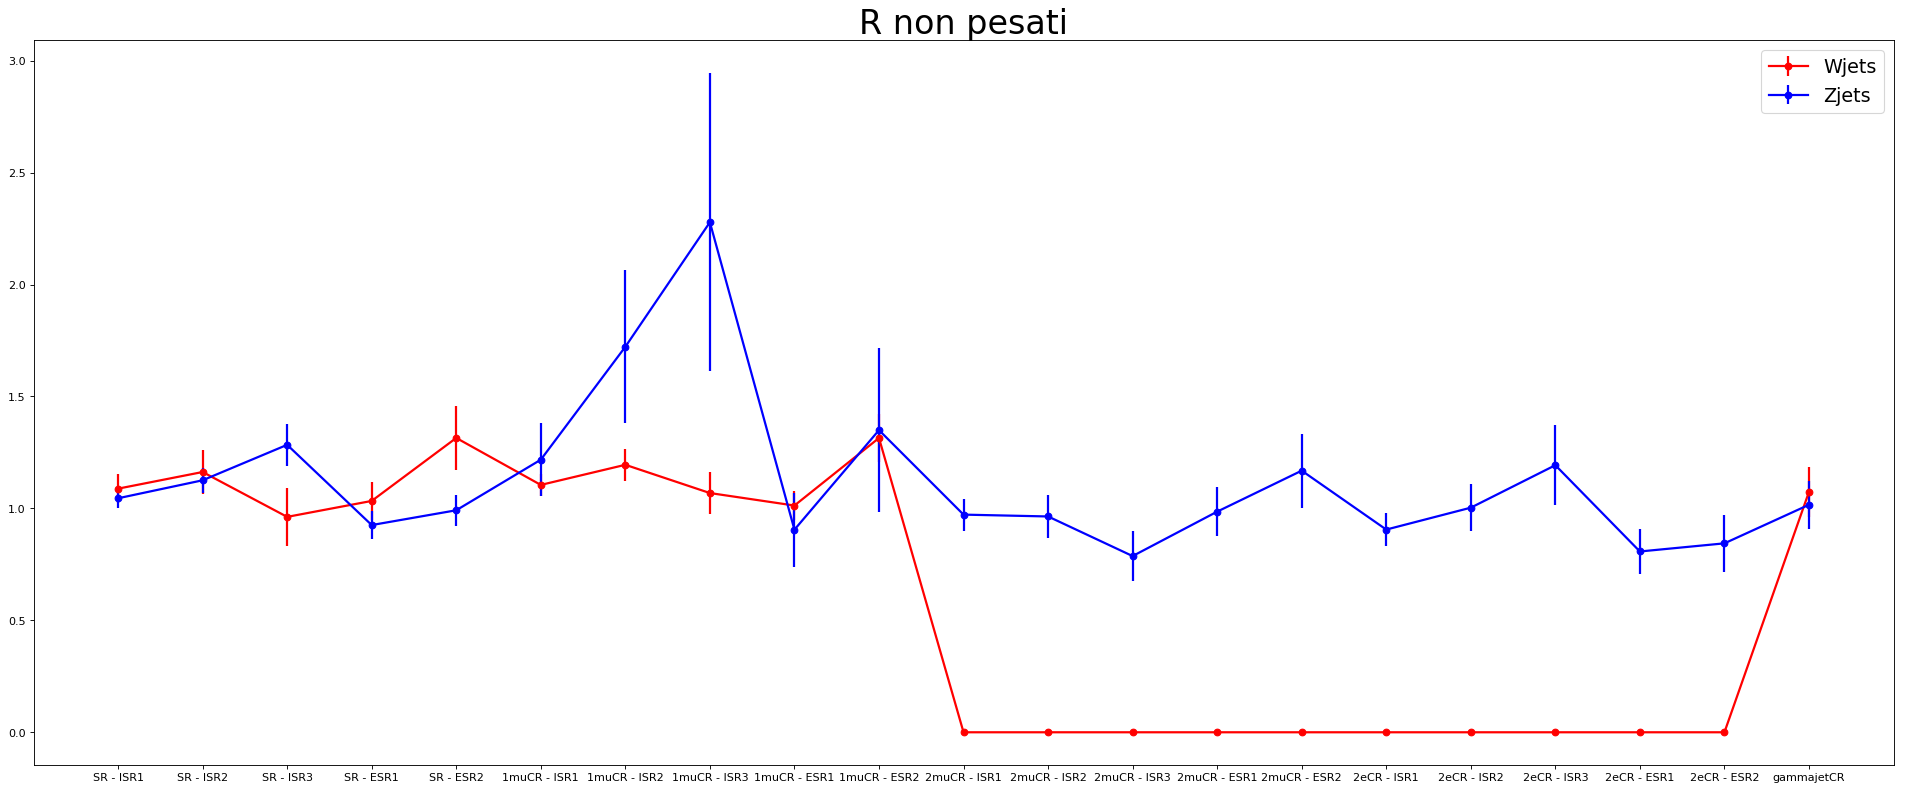

In [5]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

R = [ Wjets_non_pesati[i]["R_MC"] for i in regions ]
sigma_R = [ Wjets_non_pesati[i]["sigma_R_MC"] for i in regions ]
plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="Wjets") 

# media pesata sugli errori
print("Wjets")
num = 0;
den = 0;

for i in range(21):
    if sigma_R[i] is not 0:
        num = num + R[i]/pow(sigma_R[i], 2)
        den = den + 1/pow(sigma_R[i], 2)

R_p = num/den
sigma_p = math.sqrt(1/den)
print("R = " + repr(round(R_p, 4)) + " +- " + repr(round(sigma_p, 4)))


R = [ Zjets_non_pesati[i]["R_MC"] for i in regions ]
sigma_R = [ Zjets_non_pesati[i]["sigma_R_MC"] for i in regions ]
plt.errorbar(x, R, yerr=sigma_R, fmt="ob", linestyle="-", linewidth=2, label="Zjets") 


# media pesata sugli errori
print("\nZjets")
num = 0;
den = 0;

for i in range(21):
    if sigma_R[i] is not 0:
        num = num + R[i]/pow(sigma_R[i], 2)
        den = den + 1/pow(sigma_R[i], 2)

R_p = num/den
sigma_p = math.sqrt(1/den)
print("R = " + repr(round(R_p, 4)) + " +- " + repr(round(sigma_p, 4)))


plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("R non pesati", fontsize=30)



## Merging

## Pesati

In [6]:
# come per R_MC mergio le regioni in cui un processo è dominante
#   Wjets: SR + 1muCR
#   Zjets: SR + 2muCR + 2eCR
#   gammajetCR a parte

In [7]:
# Wjets

Na_W = [ Wjets_pesati[regions[i]]["Na_b"] + Wjets_pesati[regions[i+5]]["Na_b"] for i in range(5) ]
Nb_W = [ Wjets_pesati[regions[i]]["Nb_b"] + Wjets_pesati[regions[i+5]]["Nb_b"] for i in range(5) ]
Ma_W = [ Wjets_pesati[regions[i]]["Ma_b"] + Wjets_pesati[regions[i+5]]["Ma_b"] for i in range(5) ]
Mb_W = [ Wjets_pesati[regions[i]]["Mb_b"] + Wjets_pesati[regions[i+5]]["Mb_b"] for i in range(5) ]

R_W = [0 for _ in range(5)]
sigma_R_W = [0 for _ in range(5)]

for i in range(5):
    if Na_W[i]>0 and Nb_W[i]>0 and Ma_W[i]>0 and Mb_W[i]>0:
        try:
            R_W[i] = (Na_W[i]*Mb_W[i])/(Nb_W[i]*Ma_W[i])
            sigma_R_W[i] = R_W[i] * math.sqrt((1/Na_W[i]) + (1/Nb_W[i]) + (1/Ma_W[i]) + (1/Mb_W[i]))
        except (ZeroDivisionError, ValueError):
            R_W[i] = 0
            sigma_R_W[i] = 0
    else:
        R_W[i] = 0
        sigma_R_W[i] = 0
        
R_W.append(Wjets_pesati["gammajetCR"]["R_MC"])
sigma_R_W.append(Wjets_pesati["gammajetCR"]["sigma_R_MC"])

In [8]:
# Zjets

Na_Z = [ Zjets_pesati[regions[i]]["Na_b"] + Zjets_pesati[regions[i+10]]["Na_b"] + Zjets_pesati[regions[i+15]]["Na_b"] for i in range(5) ]
Nb_Z = [ Zjets_pesati[regions[i]]["Nb_b"] + Zjets_pesati[regions[i+10]]["Nb_b"] + Zjets_pesati[regions[i+15]]["Nb_b"] for i in range(5) ]
Ma_Z = [ Zjets_pesati[regions[i]]["Ma_b"] + Zjets_pesati[regions[i+10]]["Ma_b"] + Zjets_pesati[regions[i+15]]["Ma_b"] for i in range(5) ]
Mb_Z = [ Zjets_pesati[regions[i]]["Mb_b"] + Zjets_pesati[regions[i+10]]["Mb_b"] + Zjets_pesati[regions[i+15]]["Mb_b"] for i in range(5) ]

R_Z = [0 for _ in range(5)]
sigma_R_Z = [0 for _ in range(5)]

for i in range(5):
    if Na_Z[i]>0 and Nb_Z[i]>0 and Ma_Z[i]>0 and Mb_Z[i]>0:
        try:
            R_Z[i] = (Na_Z[i]*Mb_Z[i])/(Nb_Z[i]*Ma_Z[i])
            sigma_R_Z[i] = R_Z[i] * math.sqrt((1/Na_Z[i]) + (1/Nb_Z[i]) + (1/Ma_Z[i]) + (1/Mb_Z[i]))
        except (ZeroDivisionError, ValueError):
            R_Z[i] = 0
            sigma_R_Z[i] = 0
    else:
        R_Z[i] = 0
        sigma_R_Z[i] = 0

R_Z.append(Zjets_pesati["gammajetCR"]["R_MC"])
sigma_R_Z.append(Zjets_pesati["gammajetCR"]["sigma_R_MC"])

(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 9 Text yticklabel objects>)

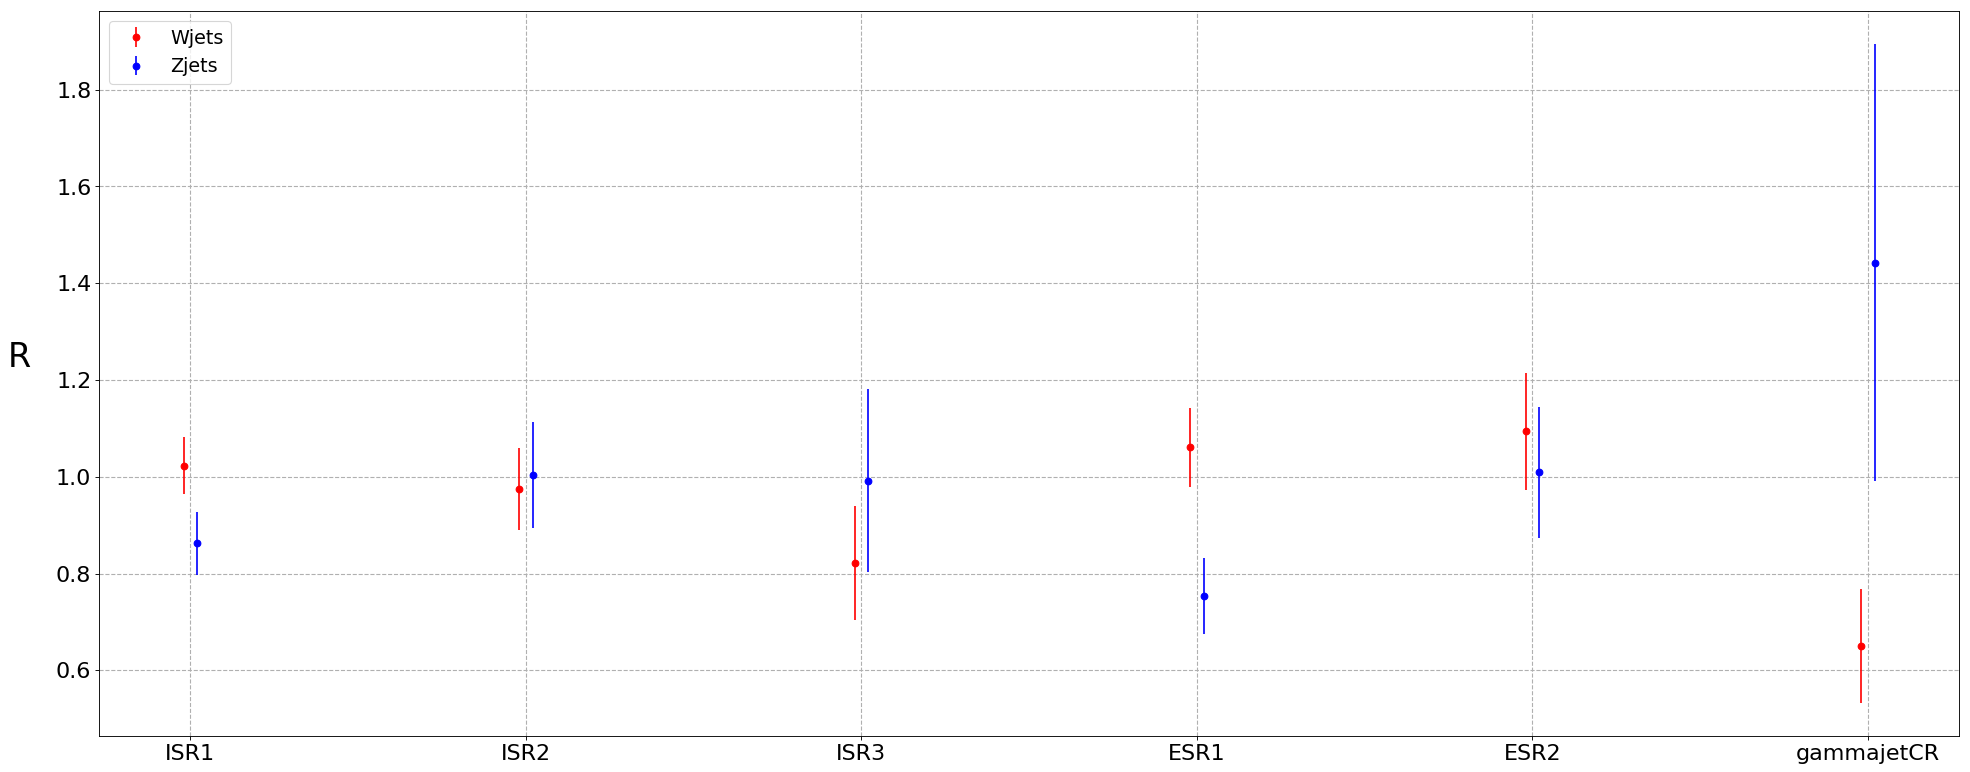

In [9]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar([i-0.02 for i in range(6)], R_W, yerr=sigma_R_W, fmt="or", linestyle="None", label="Wjets")
plt.errorbar([i+0.02 for i in range(6)], R_Z, yerr=sigma_R_Z, fmt="ob", linestyle="None", label="Zjets")

plt.xticks(range(6), ["ISR1", "ISR2", "ISR3", "ESR1", "ESR2", "gammajetCR"], fontsize=20)
plt.legend(loc=2, fontsize="xx-large")
plt.ylabel("R      ", rotation=0, fontsize=30)
plt.grid(linestyle="--", linewidth=1)
plt.yticks(fontsize=20)

# Dati 2015-2016

dati
R = 0.9393 +- 0.0296


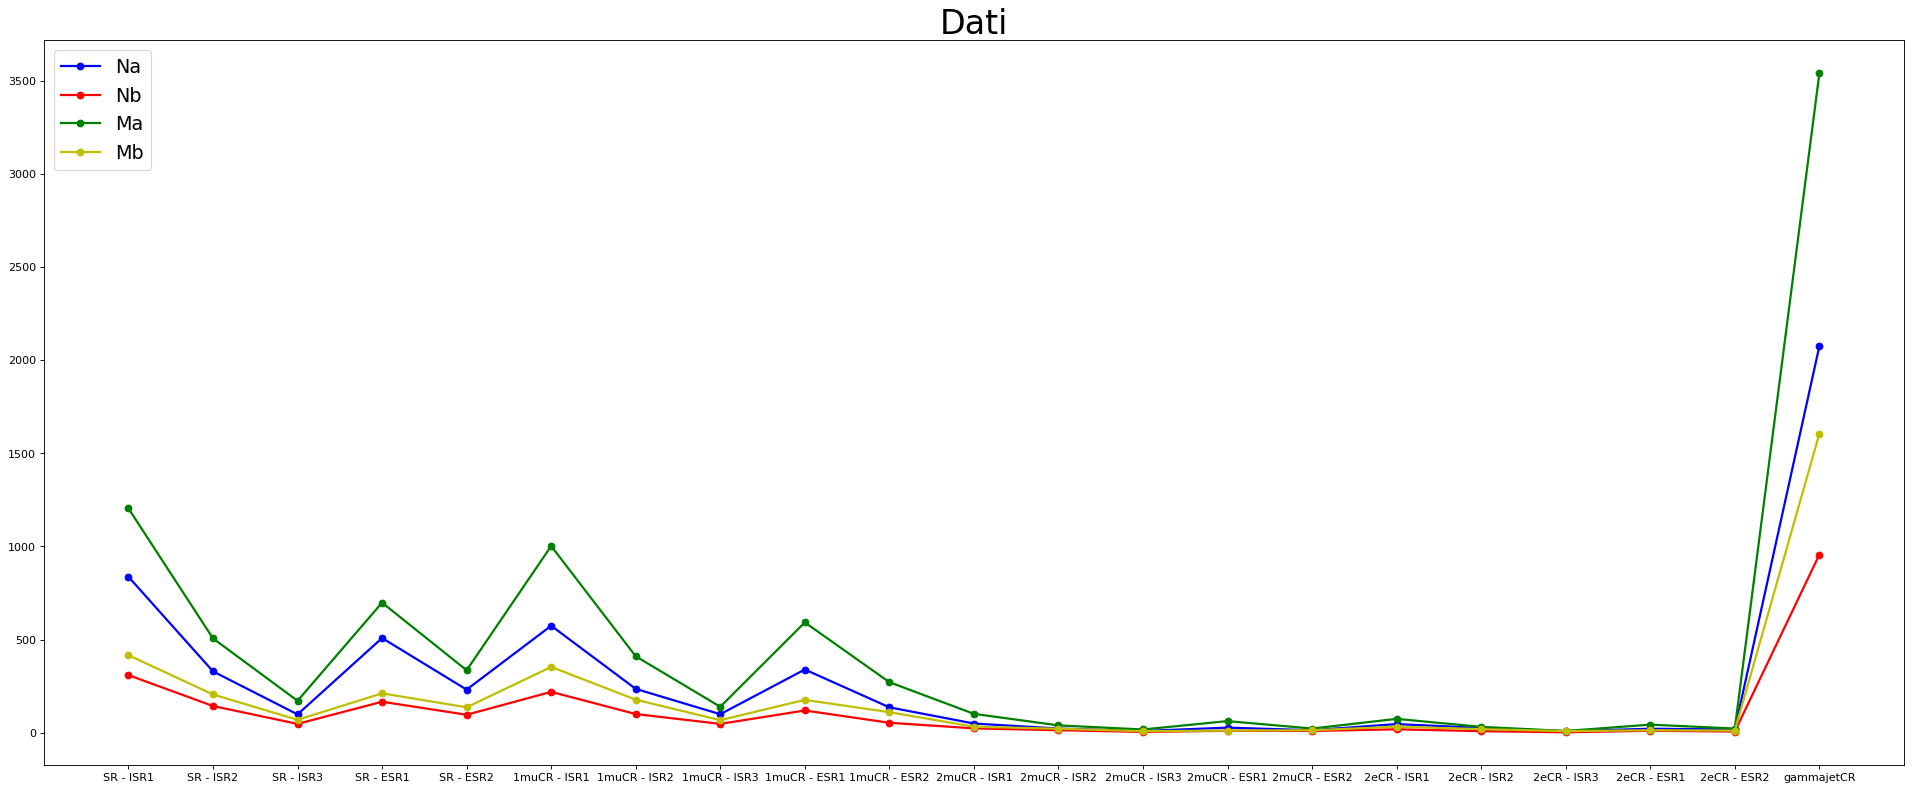

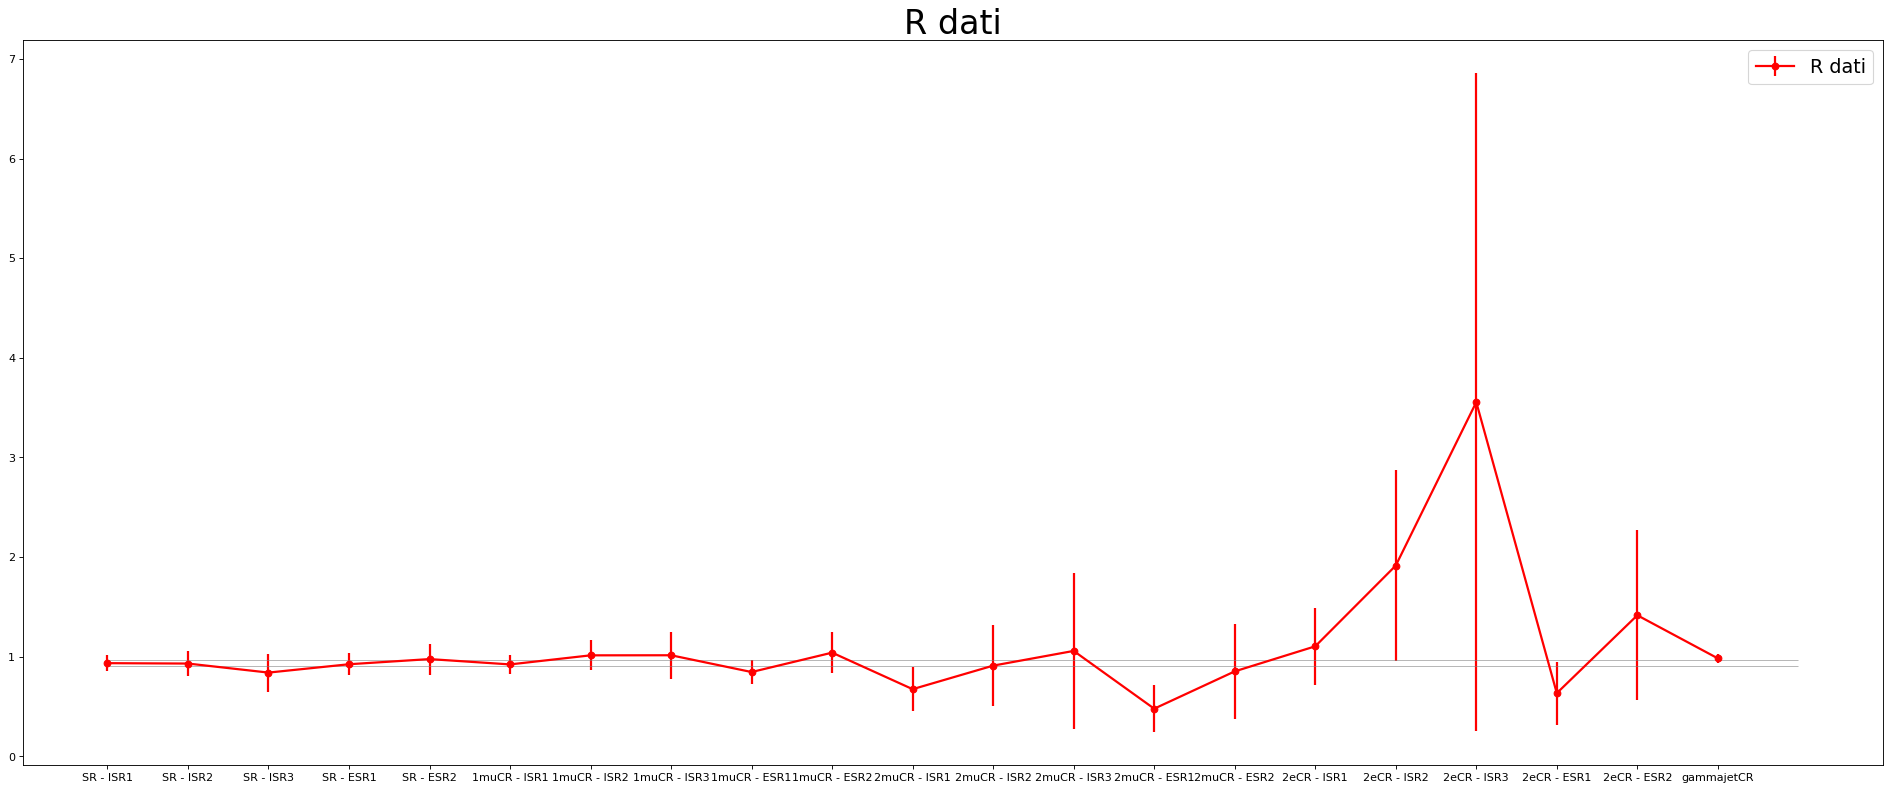

In [10]:
Na = [ R_dati[i]["Na_b"] for i in regions ]
Nb = [ R_dati[i]["Nb_b"] for i in regions ]
Ma = [ R_dati[i]["Ma_b"] for i in regions ]
Mb = [ R_dati[i]["Mb_b"] for i in regions ]

plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, Na, label="Na", color="b", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Nb, label="Nb", color="r", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Ma, label="Ma", color="g", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Mb, label="Mb", color="y", marker="o", linestyle="-", linewidth=2)

plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("Dati", fontsize=30)




R = [ R_dati[i]["R_MC"] for i in regions ]
sigma_R = [ R_dati[i]["sigma_R_MC"] for i in regions ]


plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="R dati") 
plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("R dati", fontsize=30)


# media pesata sugli errori
print("dati")
num = 0;
den = 0;

for i in range(21):
    if sigma_R[i] is not 0:
        num = num + R[i]/pow(sigma_R[i], 2)
        den = den + 1/pow(sigma_R[i], 2)

R_p = num/den
sigma_p = math.sqrt(1/den)
print("R = " + repr(round(R_p, 4)) + " +- " + repr(round(sigma_p, 4)))

plt.hlines(R_p + sigma_p, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)
plt.hlines(R_p - sigma_p, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)


## Merging

In [11]:
Na_M = [ Na[i] + Na[i+5] + Na[i+10] + Na[i+15] for i in range(5) ]
Nb_M = [ Nb[i] + Nb[i+5] + Nb[i+10] + Nb[i+15] for i in range(5) ]
Ma_M = [ Ma[i] + Ma[i+5] + Ma[i+10] + Ma[i+15] for i in range(5) ]
Mb_M = [ Mb[i] + Mb[i+5] + Mb[i+10] + Mb[i+15] for i in range(5) ]

R_M =[0 for _ in range(5)]
sigma_R_M =[0 for _ in range(5)]

for i in range(5):
    if Na_M[i]>0 and Nb_M[i]>0 and Ma_M[i]>0 and Mb_M[i]>0:
        try:
            R_M[i] = (Na_M[i]*Mb_M[i])/(Nb_M[i]*Ma_M[i])
            sigma_R_M[i] = R_M[i] * math.sqrt((1/Na_M[i]) + (1/Nb_M[i]) + (1/Ma_M[i]) + (1/Mb_M[i]))
        except (ZeroDivisionError, ValueError):
            R_M[i] = 0
            sigma_R_M[i] = 0
    else:
        R_M[i] = 0
        sigma_R_M[i] = 0

R_M.append(R_dati["gammajetCR"]["R_MC"])
sigma_R_M.append(R_dati["gammajetCR"]["sigma_R_MC"])

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3]),
 <a list of 10 Text yticklabel objects>)

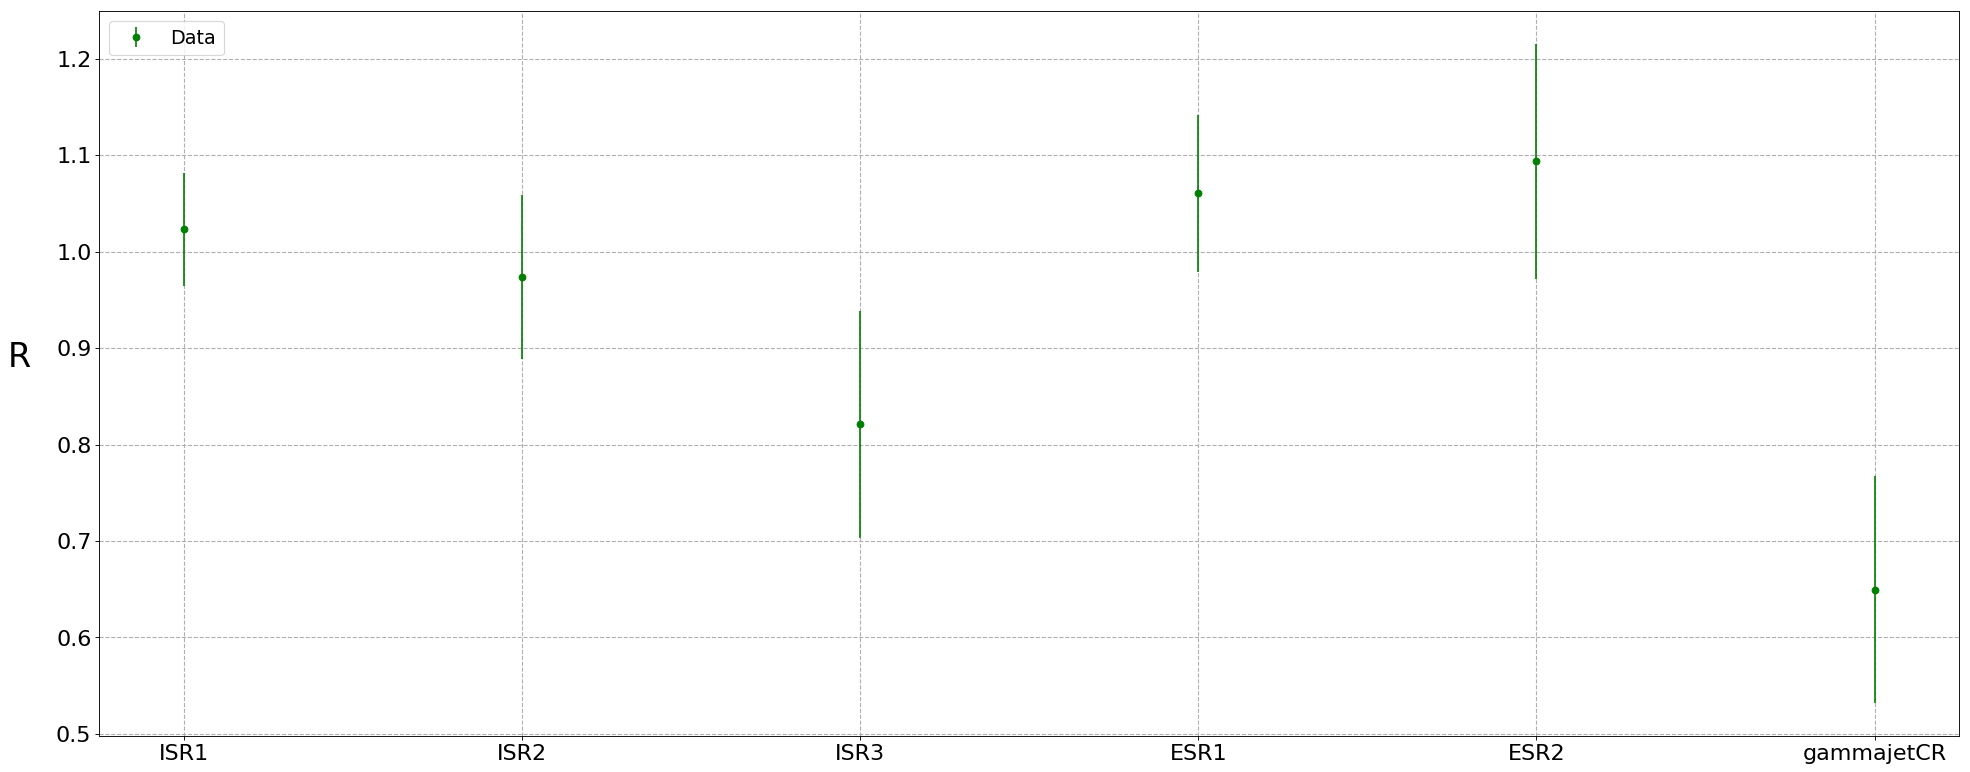

In [12]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar([i for i in range(6)], R_W, yerr=sigma_R_W, fmt="og", linestyle="None", label="Data")

plt.xticks(range(6), ["ISR1", "ISR2", "ISR3", "ESR1", "ESR2", "gammajetCR"], fontsize=20)
plt.legend(loc=2, fontsize="xx-large")
plt.ylabel("R      ", rotation=0, fontsize=30)
plt.grid(linestyle="--", linewidth=1)
plt.yticks(fontsize=20)

# Confronto

(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 9 Text yticklabel objects>)

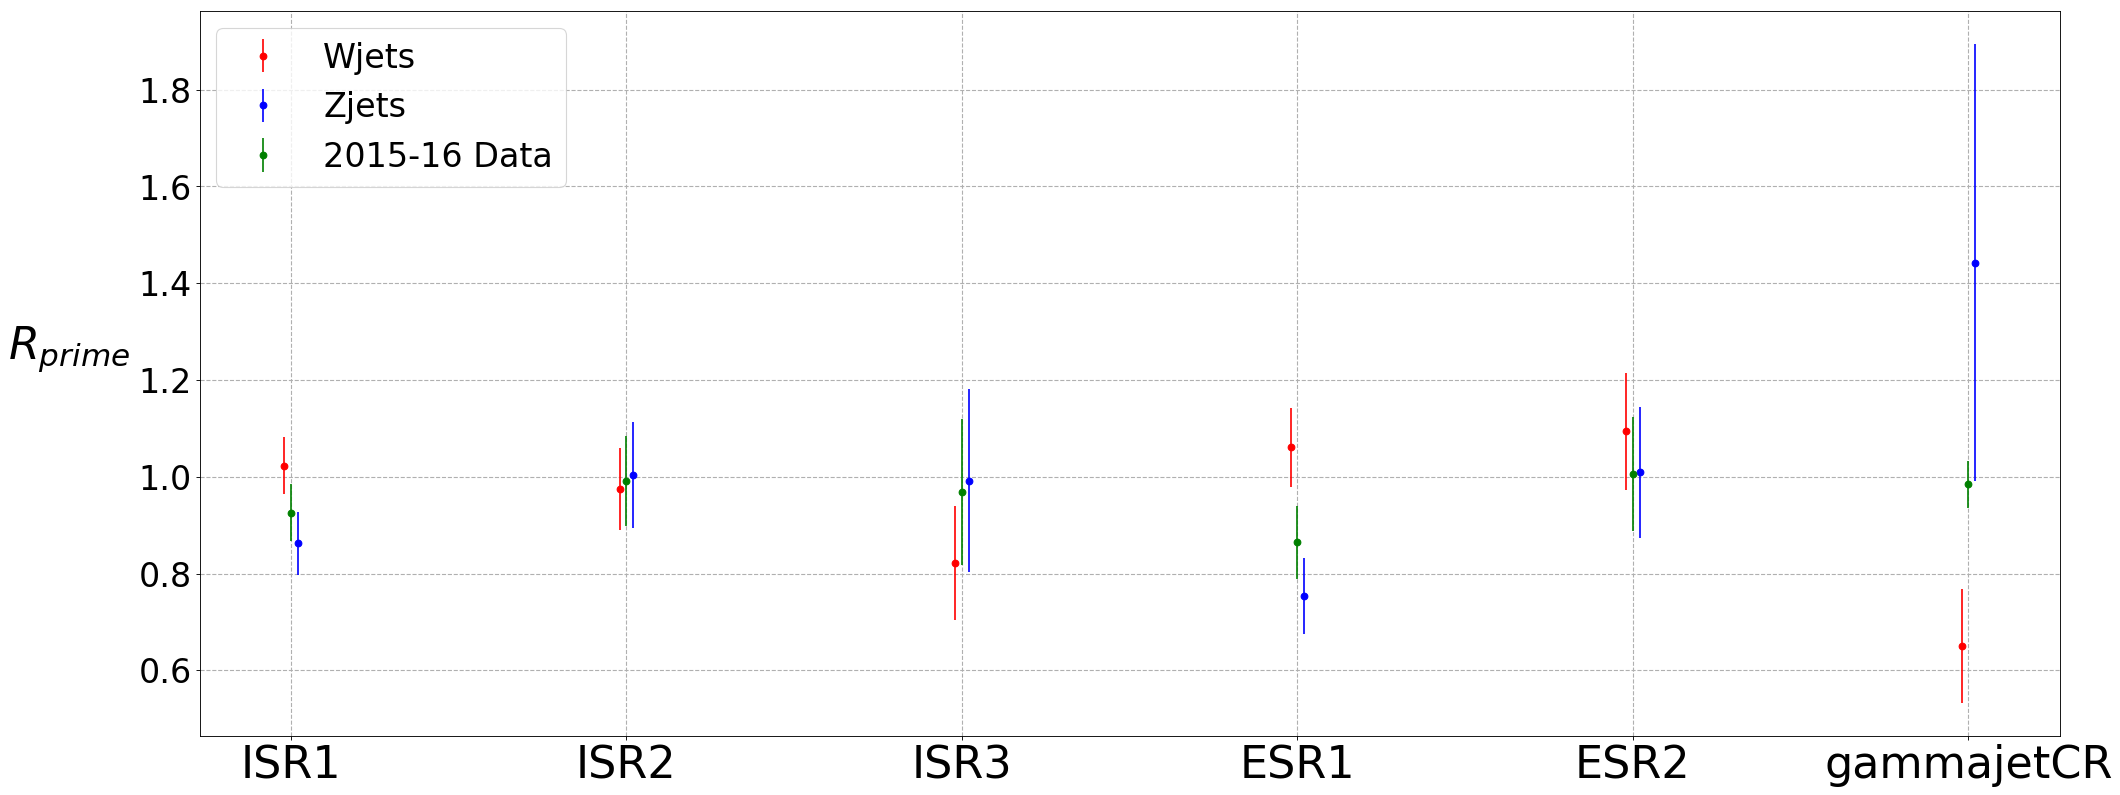

In [13]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar([i-0.02 for i in range(6)], R_W, yerr=sigma_R_W, fmt="or", linestyle="None", label="Wjets")
plt.errorbar([i+0.02 for i in range(6)], R_Z, yerr=sigma_R_Z, fmt="ob", linestyle="None", label="Zjets")
plt.errorbar([i for i in range(6)], R_M, yerr=sigma_R_M, fmt="og", linestyle="None", label="2015-16 Data")



plt.xticks(range(6), ["ISR1", "ISR2", "ISR3", "ESR1", "ESR2", "gammajetCR"], fontsize=40)
plt.legend(loc=2, fontsize=30)
plt.ylabel("$R_{prime}$          ", rotation=0, fontsize=40)
plt.grid(linestyle="--", linewidth=1)
plt.yticks(fontsize=30)